# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 


## Reading csv file

In [5]:
train = pd.read_csv('GUIDE_Train.csv',parse_dates=['Timestamp'],nrows=100000)

In [6]:
test = pd.read_csv('GUIDE_Test.csv',parse_dates=['Timestamp'],nrows=100000)

## Statistical Information

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Id                  100000 non-null  int64              
 1   OrgId               100000 non-null  int64              
 2   IncidentId          100000 non-null  int64              
 3   AlertId             100000 non-null  int64              
 4   Timestamp           100000 non-null  datetime64[ns, UTC]
 5   DetectorId          100000 non-null  int64              
 6   AlertTitle          100000 non-null  int64              
 7   Category            100000 non-null  object             
 8   MitreTechniques     44576 non-null   object             
 9   IncidentGrade       100000 non-null  object             
 10  ActionGrouped       41 non-null      object             
 11  ActionGranular      41 non-null      object             
 12  EntityType       

In [11]:
test.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.010000e+03,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.459664e+11,176.583910,68302.152800,4.066381e+05,101.075840,2521.485210,95741.633450,128442.27145,287141.61274,150532.782340,353898.400090,470974.942160,342592.488830,358843.936480,141746.059880,482771.086280,3.206339e+09,1627.835510,634.535670,859.245540,2199.447220,3340.665110,880.811410,262138.108550,107475.569940,3583.351770,4.899540,64.668910,221.901590,1343.104640,9873.386630
std,4.927110e+11,371.844443,118305.966324,4.541629e+05,409.654163,10440.033559,16197.980476,34510.62411,140246.46971,37127.784807,165757.314453,288438.077497,159204.169064,173522.163358,38673.004987,137849.353392,1.030317e+09,70.548028,16.916451,24.899628,336.329349,517.117507,12.419542,81826.910144,32526.757687,93.627561,0.700166,9.269635,65.478337,365.098526,2713.863069
min,1.000000e+00,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.598851e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.209068e+11,8.000000,413.000000,2.381050e+04,2.000000,2.000000,98799.000000,138268.00000,360606.00000,160396.000000,441377.000000,102448.750000,425863.000000,453297.000000,153085.000000,529644.000000,2.681535e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
50%,8.332237e+11,43.000000,9082.000000,2.239770e+05,7.000000,9.000000,98799.000000,138268.00000,360606.00000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,3.378738e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
75%,1.271310e+12,172.000000,80591.250000,6.657640e+05,39.000000,113.000000,98799.000000,138268.00000,360606.00000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,4.103007e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
max,1.709397e+12,5946.000000,599533.000000,1.721001e+06,9515.000000,113052.000000,98799.000000,138268.00000,360606.00000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,4.293982e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000


## Missing Columns

In [14]:
# Find completely empty columns
empty_columns = test.columns[test.isna().any()].tolist()
print("Completely empty columns:", empty_columns)

empty = test[['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']]

# Calculate percentage of empty rows for each column
empty_percentage = empty.isna().sum() / len(empty) * 100
print("\nPercentage of empty rows in each column:")
print(empty_percentage)


Completely empty columns: ['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']

Percentage of empty rows in each column:
MitreTechniques      55.424
IncidentGrade         0.000
ActionGrouped        99.959
ActionGranular       99.959
EmailClusterId       98.990
ThreatFamily         99.246
ResourceType         99.923
Roles                97.281
AntispamDirection    98.095
SuspicionLevel       84.529
LastVerdict          76.091
dtype: float64


In [16]:
# Drop the columns more than 90% empty data
test.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection'],axis=1,inplace=True)

In [18]:
test.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630,Public


In [20]:
# Identify duplicate rows where all columns match
#duplicate_rows = trainn[trainn.duplicated()]

# Count the number of such duplicate rows
num_duplicates = test.duplicated().sum()
print(f"Number of duplicate rows with identical values across all columns: {num_duplicates}")

Number of duplicate rows with identical values across all columns: 38


In [22]:
test = test.drop_duplicates()

In [24]:
test.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade             0
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
SuspicionLevel        84491
LastVerdict           76086
CountryCode               0
State               

## Handling Missing Values

In [27]:
cat=[]
num=[]

for col in test.columns:
    if test[col].dtypes == 'O':
        cat.append(col)
    elif test[col].dtypes != 'O':
        num.append(col)

print(cat)
print('-----------------'*5)
print(num)

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'SuspicionLevel', 'LastVerdict', 'Usage']
-------------------------------------------------------------------------------------
['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City']


In [29]:
for col in cat:
    test[col] = test[col].fillna(test[col].mode()[0])

In [31]:
test.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [33]:
for col in test.columns:
    print('Column Name :',col,'-','Number of length :',test[col].nunique())
    print(test[col].unique())  
    print('----' * 8)

Column Name : Id - Number of length : 44491
[1245540519230 1400159342154 1279900255923 ...  309237646299  987842479668
 1322849927399]
--------------------------------
Column Name : OrgId - Number of length : 2374
[ 657    3  145 ... 1460 2755 2085]
--------------------------------
Column Name : IncidentId - Number of length : 42495
[ 11767  91158  32247 ... 234199  35575 409369]
--------------------------------
Column Name : AlertId - Number of length : 76313
[  87199  632273  131719 ...  447214 1007169   75060]
--------------------------------
Column Name : Timestamp - Number of length : 73679
<DatetimeArray>
['2024-06-04 22:56:27+00:00', '2024-06-03 12:58:26+00:00',
 '2024-06-08 03:20:49+00:00', '2024-06-12 12:07:31+00:00',
 '2024-06-06 17:42:05+00:00', '2024-06-06 08:10:50+00:00',
 '2024-06-15 04:06:55+00:00', '2024-05-26 11:48:38+00:00',
 '2024-05-25 17:57:20+00:00', '2024-06-02 05:46:22+00:00',
 ...
 '2024-06-12 04:44:34+00:00', '2024-05-23 06:20:14+00:00',
 '2024-06-13 05:24:10+

## Data Cleaning and Preprocessing

In [36]:
test['year']=test['Timestamp'].dt.year
test['month']=test['Timestamp'].dt.month
test['time']=test['Timestamp'].dt.hour

In [38]:
counts = test['LastVerdict'].value_counts()
low = counts[counts <= 100].index
test['LastVerdict'] = test['LastVerdict'].apply(lambda x: 'Malicious' if x in low else x)


In [40]:
test.shape

(99962, 41)

In [42]:
for col in cat:
    print(test.groupby(['IncidentGrade',col]).size())

IncidentGrade   Category           
BenignPositive  Collection                51
                CommandAndControl       5830
                CredentialAccess        1130
                DefenseEvasion           303
                Discovery                925
                Execution               1448
                Exfiltration           10336
                Exploit                   23
                Impact                  3219
                InitialAccess          11231
                LateralMovement          306
                Malware                 1269
                Persistence              502
                PrivilegeEscalation       34
                Ransomware               112
                SuspiciousActivity      5476
                UnwantedSoftware         136
FalsePositive   Collection                57
                CommandAndControl       1406
                CredentialAccess         687
                CredentialStealing        22
                Def

In [ ]:
test['IncidentGrade'].value_counts()

# Exploratory Data Analysis

## Numerical Visualisation

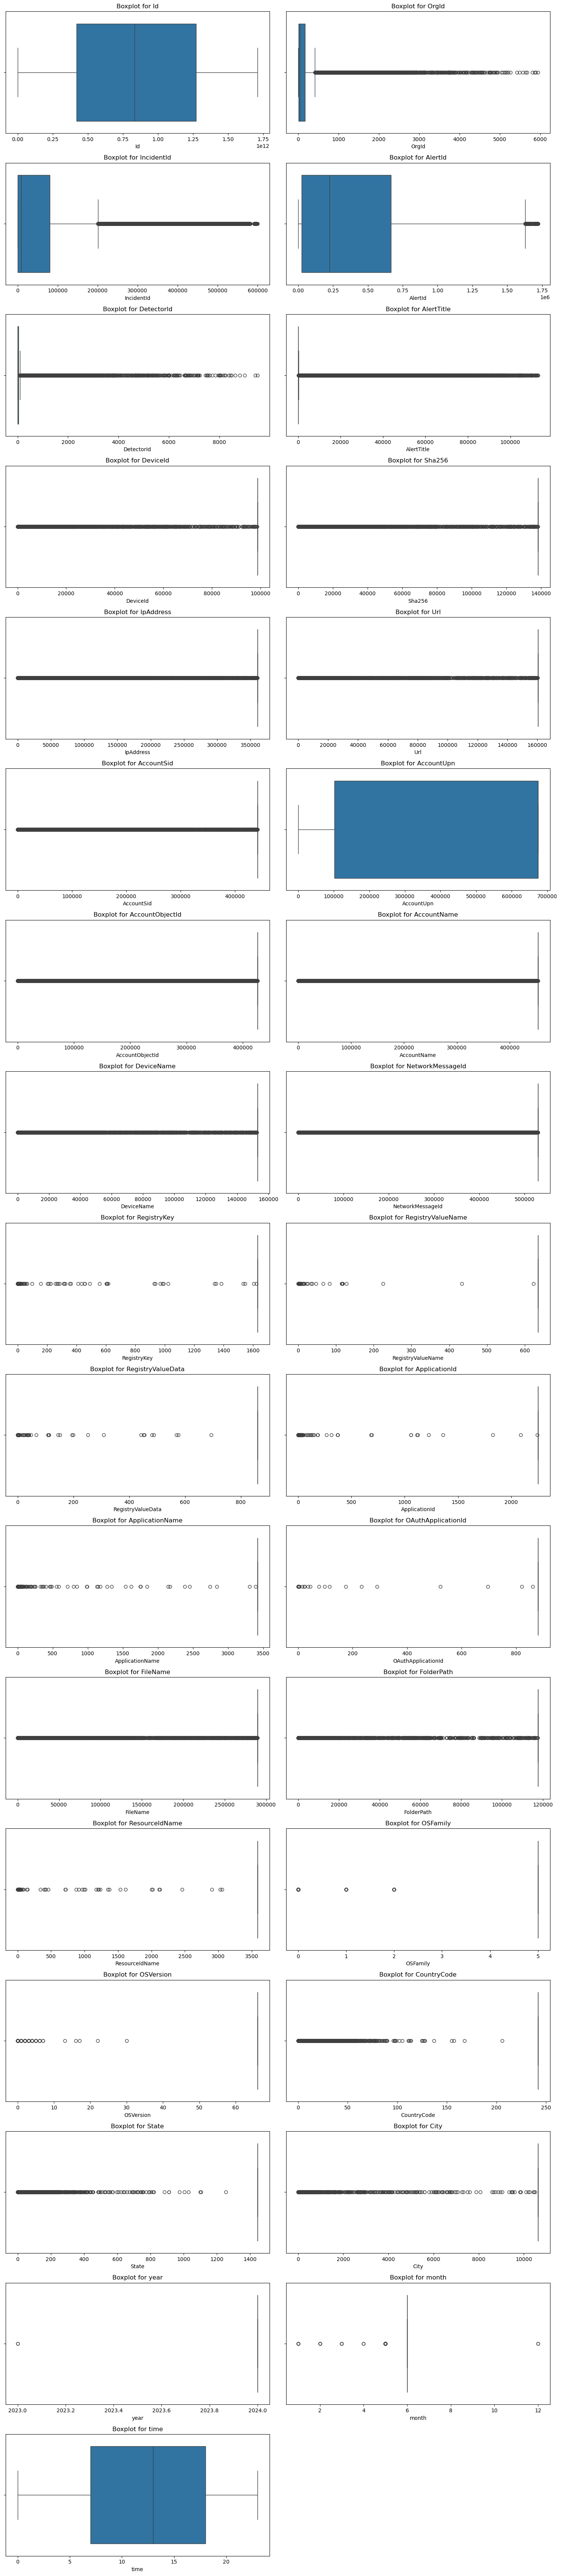

In [46]:
numerical_cols = test.select_dtypes(include=['int64', 'float64','int32']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=test,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

## Removing outliers

In [52]:
numerical_cols = test.select_dtypes(include=['int64', 'float64','int32']).columns

# Cleanning outliers using the IQR method
def clean_outliers_iqr(df, numerical_cols, method='remove'):
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(test, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(test, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])

Data cleaned by removing outliers. Remaining rows: 9221
Data cleaned by capping outliers. Remaining rows: 99962


In [54]:
cleaned_data_cap.head(6)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage,year,month,time
0,1245540519230,418,11767.0,87199.0,2024-06-04 22:56:27+00:00,94.5,279.5,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,441377,3699,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Private,2024,6,22
1,1400159342154,3,91158.0,632273.0,2024-06-03 12:58:26+00:00,2.0,2.0,CommandAndControl,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public,2024,6,12
2,1279900255923,145,32247.0,131719.0,2024-06-08 03:20:49+00:00,94.5,279.5,LateralMovement,BenignPositive,Process,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public,2024,6,3
3,60129547292,222,15294.0,917686.0,2024-06-12 12:07:31+00:00,0.0,0.0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public,2024,6,12
4,515396080539,363,7615.0,5944.0,2024-06-06 17:42:05+00:00,27.0,18.0,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public,2024,6,17
5,670014899930,0,238.0,378946.0,2024-06-06 08:10:50+00:00,0.0,0.0,InitialAccess,TruePositive,User,Impacted,98799,138268,360606,160396,441377,3392,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,Public,2024,6,8


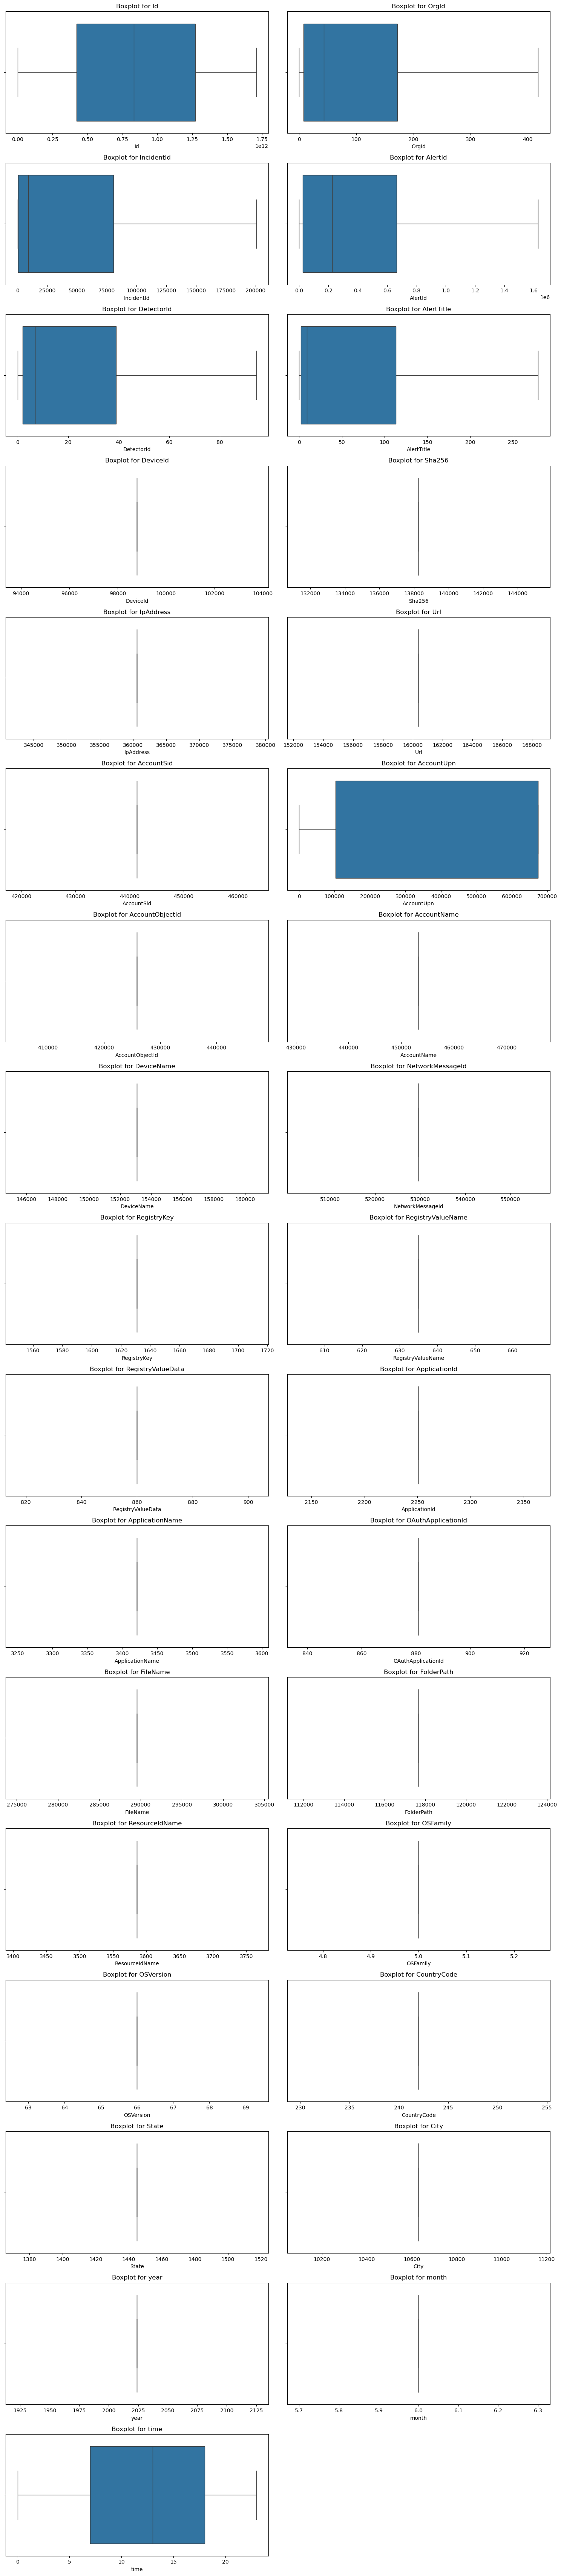

In [56]:
numerical_cols = cleaned_data_cap.select_dtypes(include=['int64', 'float64','int32']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=cleaned_data_cap,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

In [59]:
cleaned_data_cap.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'SuspicionLevel', 'LastVerdict', 'Usage'],
      dtype='object')

In [61]:
# Removing Highly correlated columns

cleaned_data_cap.drop(["CountryCode","OSFamily","State","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

cleaned_data_cap.drop(['DeviceId', 'IpAddress', 'Url', 'DeviceName', 'NetworkMessageId','RegistryKey',  'RegistryValueData','ApplicationId', 'OAuthApplicationId', 
             'FileName', 'ResourceIdName', 'OSVersion', 'City'], axis =1 , inplace = True)


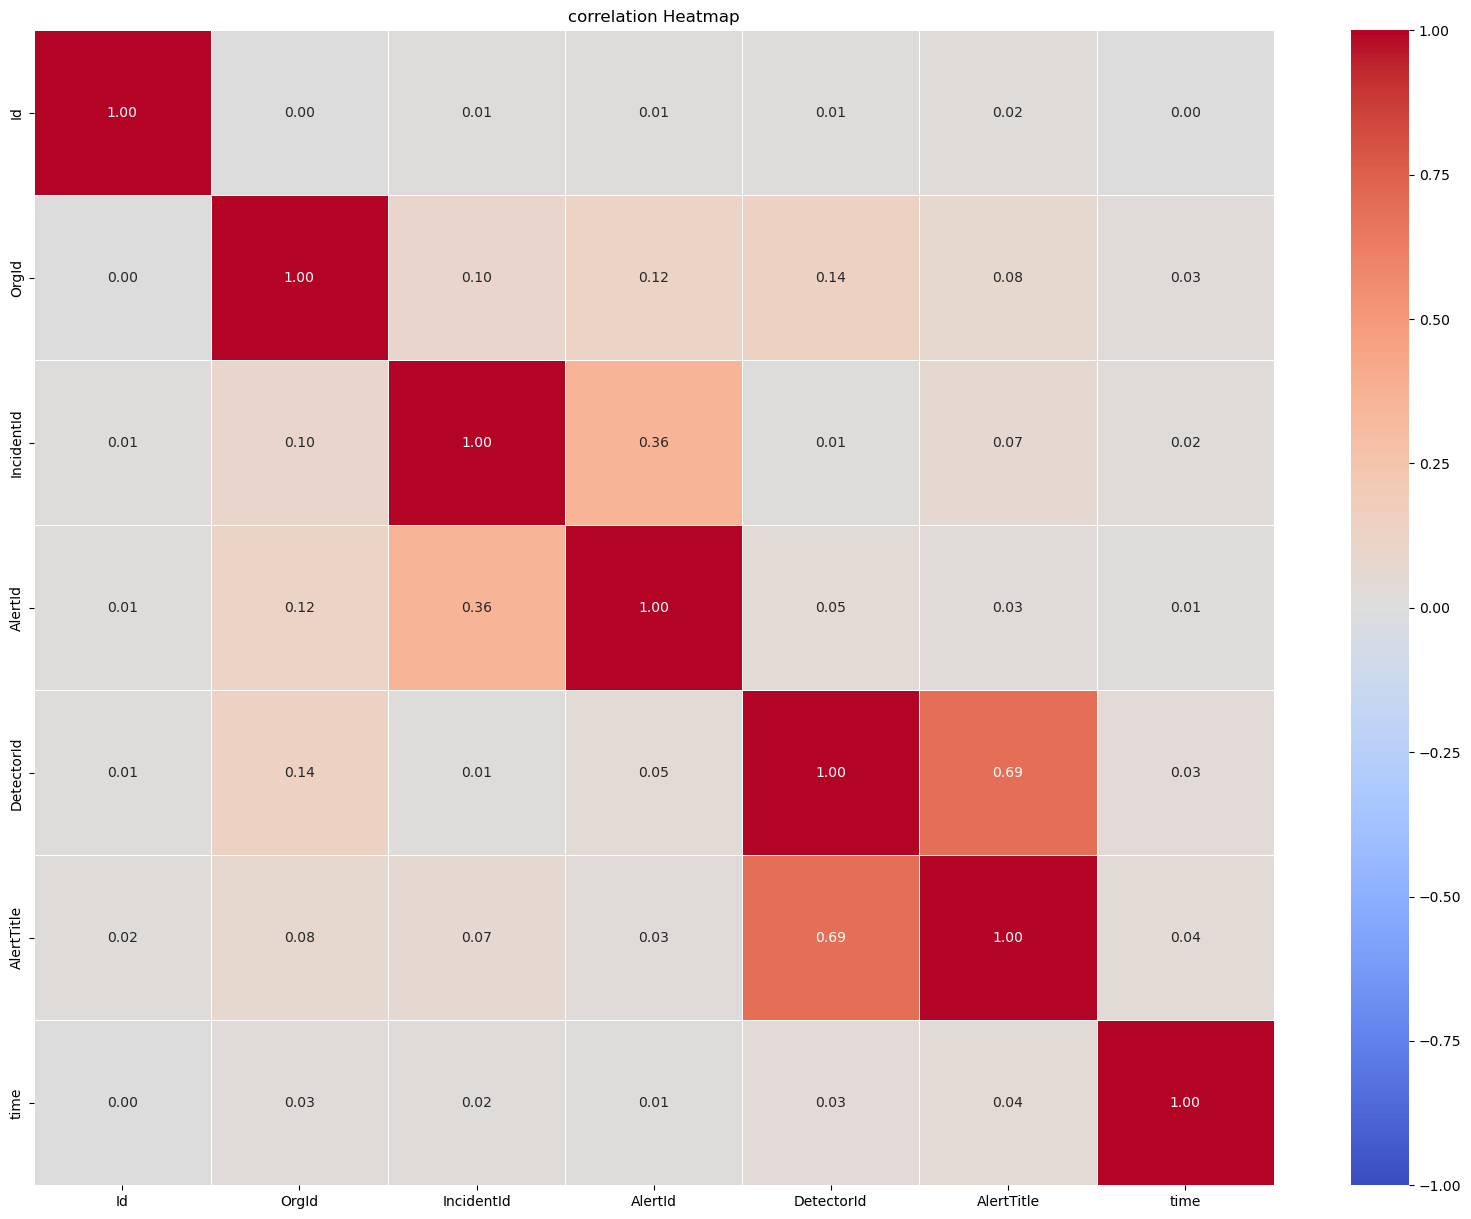

In [67]:
# selecting numerical col
nume=cleaned_data_cap.select_dtypes(include=['number'])

corr_matrix= nume.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [65]:
cleaned_data_cap.drop(["AccountName","year","month"], axis =1 , inplace = True)


In [69]:
cleaned_data_cap.shape

(99962, 15)

In [71]:
cleaned_data_cap.head(3)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,SuspicionLevel,LastVerdict,Usage,time
0,1245540519230,418,11767.0,87199.0,2024-06-04 22:56:27+00:00,94.5,279.5,LateralMovement,BenignPositive,User,Impacted,Suspicious,Suspicious,Private,22
1,1400159342154,3,91158.0,632273.0,2024-06-03 12:58:26+00:00,2.0,2.0,CommandAndControl,BenignPositive,Machine,Impacted,Suspicious,Suspicious,Public,12
2,1279900255923,145,32247.0,131719.0,2024-06-08 03:20:49+00:00,94.5,279.5,LateralMovement,BenignPositive,Process,Related,Suspicious,Suspicious,Public,3


In [73]:
from sklearn.preprocessing import LabelEncoder

label_cat = [ 'IncidentGrade', 'EvidenceRole','SuspicionLevel', 'LastVerdict']

label_encoder = LabelEncoder()

for col in label_cat:
    cleaned_data_cap[col + '_Encoded'] = label_encoder.fit_transform(cleaned_data_cap[col])

# Check the encoded columns
#print(carclean[[col + '_Encoded' for col in label_cat]].head())
cleaned_data_cap.head(3)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,SuspicionLevel,LastVerdict,Usage,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded
0,1245540519230,418,11767.0,87199.0,2024-06-04 22:56:27+00:00,94.5,279.5,LateralMovement,BenignPositive,User,Impacted,Suspicious,Suspicious,Private,22,0,0,1,2
1,1400159342154,3,91158.0,632273.0,2024-06-03 12:58:26+00:00,2.0,2.0,CommandAndControl,BenignPositive,Machine,Impacted,Suspicious,Suspicious,Public,12,0,0,1,2
2,1279900255923,145,32247.0,131719.0,2024-06-08 03:20:49+00:00,94.5,279.5,LateralMovement,BenignPositive,Process,Related,Suspicious,Suspicious,Public,3,0,1,1,2


In [75]:
cleaned_data_cap.drop(['IncidentGrade', 'EvidenceRole','SuspicionLevel', 'LastVerdict'], axis =1 , inplace = True)


In [77]:
# one-hot encode model_data

categorical_columns = ['Category','EntityType','Usage']
cleancyber = pd.get_dummies(cleaned_data_cap, columns=categorical_columns,dtype=int)
cleancyber.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded,Category_Collection,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,EntityType_ActiveDirectoryDomain,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_File,EntityType_GenericEntity,EntityType_Ip,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,Usage_Private,Usage_Public
0,1245540519230,418,11767.0,87199.0,2024-06-04 22:56:27+00:00,94.5,279.5,22,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1400159342154,3,91158.0,632273.0,2024-06-03 12:58:26+00:00,2.0,2.0,12,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1279900255923,145,32247.0,131719.0,2024-06-08 03:20:49+00:00,94.5,279.5,3,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,60129547292,222,15294.0,917686.0,2024-06-12 12:07:31+00:00,0.0,0.0,12,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,515396080539,363,7615.0,5944.0,2024-06-06 17:42:05+00:00,27.0,18.0,17,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [79]:
cleancyber.drop(['Timestamp'],axis=1,inplace=True)

In [81]:
cleancyber.head(3)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded,Category_Collection,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,EntityType_ActiveDirectoryDomain,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_File,EntityType_GenericEntity,EntityType_Ip,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,Usage_Private,Usage_Public
0,1245540519230,418,11767.0,87199.0,94.5,279.5,22,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1400159342154,3,91158.0,632273.0,2.0,2.0,12,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1279900255923,145,32247.0,131719.0,94.5,279.5,3,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [83]:
cleancyber.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'time', 'IncidentGrade_Encoded', 'EvidenceRole_Encoded',
       'SuspicionLevel_Encoded', 'LastVerdict_Encoded', 'Category_Collection',
       'Category_CommandAndControl', 'Category_CredentialAccess',
       'Category_CredentialStealing', 'Category_DefenseEvasion',
       'Category_Discovery', 'Category_Execution', 'Category_Exfiltration',
       'Category_Exploit', 'Category_Impact', 'Category_InitialAccess',
       'Category_LateralMovement', 'Category_Malware', 'Category_Persistence',
       'Category_PrivilegeEscalation', 'Category_Ransomware',
       'Category_SuspiciousActivity', 'Category_UnwantedSoftware',
       'EntityType_ActiveDirectoryDomain', 'EntityType_AzureResource',
       'EntityType_Blob', 'EntityType_BlobContainer',
       'EntityType_CloudApplication', 'EntityType_CloudLogonRequest',
       'EntityType_CloudLogonSession', 'EntityType_File',
       'EntityType_GenericEntity', 'Entity

In [87]:
#cleancyber.to_csv('testcyber.csv',index=False)

In [89]:
train = pd.read_csv('traincyber.csv')
test = pd.read_csv('testcyber.csv')

In [91]:
train.shape

(99980, 55)

In [93]:
test.shape

(99962, 54)

In [95]:
# Find mismatched columns
train_columns = set(train.columns)
test_columns = set(test.columns)

# Columns to drop from train_df and test_df
columns_to_drop_from_train = train_columns - test_columns
columns_to_drop_from_test = test_columns - train_columns

# Drop mismatched columns
train = train.drop(columns=columns_to_drop_from_train, errors='ignore')
test = test.drop(columns=columns_to_drop_from_test, errors='ignore')


# Verify the shapes and columns are the same
print("Train DataFrame Shape:", train.shape)
print("Test DataFrame Shape:", test.shape)
print("Matching Columns:", train.columns.equals(test.columns))

Train DataFrame Shape: (99980, 52)
Test DataFrame Shape: (99962, 52)
Matching Columns: True


Accuracy Score: 0.8431

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42331
           1       0.76      0.78      0.77     21605
           2       0.90      0.85      0.87     36026

    accuracy                           0.84     99962
   macro avg       0.83      0.83      0.83     99962
weighted avg       0.84      0.84      0.84     99962



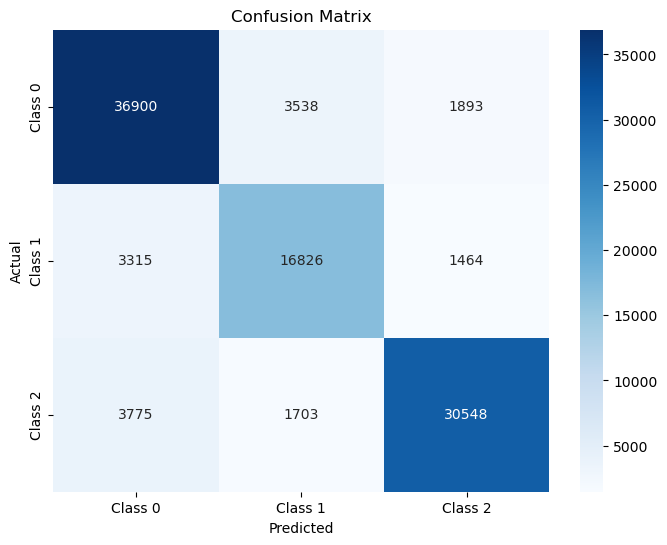

In [100]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming train_data and test_data are already available)
X_train = train.drop(columns=['IncidentGrade_Encoded'])
y_train = train['IncidentGrade_Encoded']
X_test = test.drop(columns=['IncidentGrade_Encoded'])
y_test = test['IncidentGrade_Encoded']


# Apply StandardScaler to the features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the Random Forest Classifier with class weights
rf_model_with_weights_smote = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with the resampled data
rf_model_with_weights_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model_with_weights_smote.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     42331
           1       0.66      0.80      0.72     21605
           2       0.91      0.77      0.83     36026

    accuracy                           0.80     99962
   macro avg       0.79      0.80      0.79     99962
weighted avg       0.81      0.80      0.80     99962



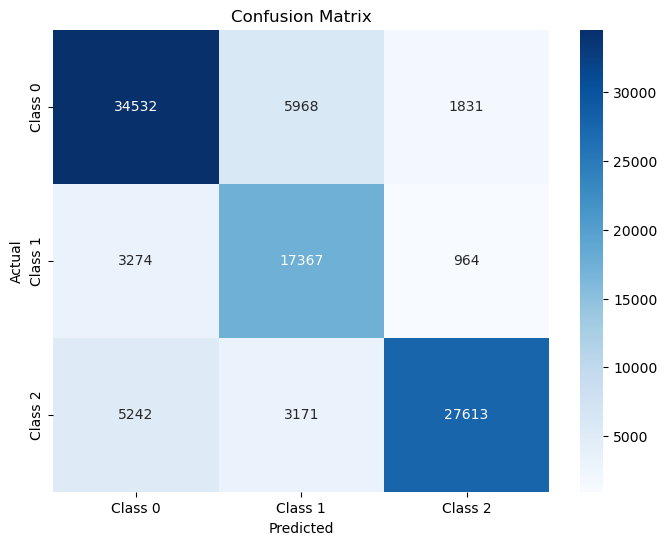

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train_resampled, y_train_resampled)


# Predict on the test set
y_pred = gb_classifier.predict(X_test_scaled)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     42331
           1       0.42      0.47      0.45     21605
           2       0.68      0.69      0.69     36026

    accuracy                           0.61     99962
   macro avg       0.58      0.59      0.59     99962
weighted avg       0.61      0.61      0.61     99962



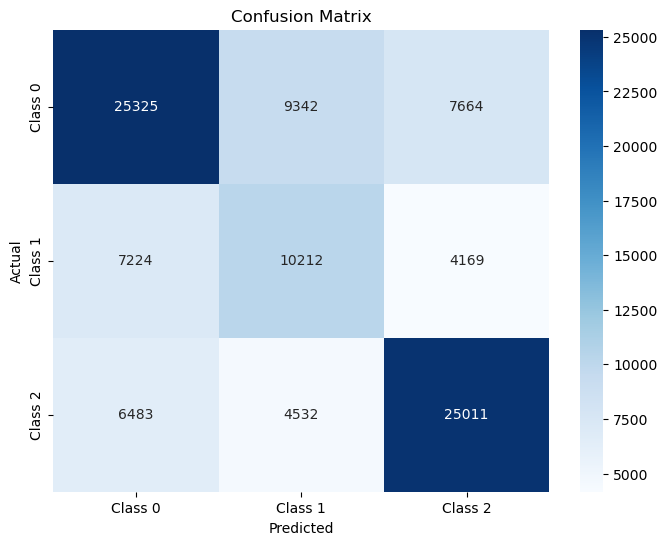

In [104]:
model = LogisticRegression(max_iter=200, solver='lbfgs')
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
